In [534]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.stats
import os
import glob
absolute_path = os.path.abspath(os.path.dirname('combined_data_1.txt'))
print(absolute_path)

/Users/gorevaalina


In [268]:
!jupyter notebook --generate-config


Overwrite /Users/gorevaalina/.jupyter/jupyter_notebook_config.py with default config? [y/N]^C



In [271]:
! jupyter notebook --NotebookApp.max_buffer_size=your_value

[C 12:40:52.897 NotebookApp] Bad config encountered during initialization: The 'max_buffer_size' trait of a NotebookApp instance expected an int, not the str 'your_value'.


In [578]:
df1 = pd.read_csv('/Users/gorevaalina/Downloads/archive/combined_data_1.csv', header = None, names = ['customer_id', 'rating', 'review_date'])
df2 = pd.read_csv('/Users/gorevaalina/Downloads/archive/combined_data_2.csv', header = None, names = ['customer_id', 'rating', 'review_date'])
df3 = pd.read_csv('/Users/gorevaalina/Downloads/archive/combined_data_3.csv', header = None, names = ['customer_id', 'rating', 'review_date'])
df4 = pd.read_csv('/Users/gorevaalina/Downloads/archive/combined_data_4.csv', header = None, names = ['customer_id', 'rating', 'review_date'])

df = pd.concat([df1, df2, df3, df4])
tmp_var = 1

def extract_movie_id(user_id):
    if user_id[-1] == ':':
        return user_id[:-1]
    else:
        return None

df['movie_id'] = df['customer_id'].apply(extract_movie_id) 
df['movie_id'] = df['movie_id'].fillna(method='ffill') 
df.dropna(subset=['rating'], inplace=True)
df.reset_index(drop=True, inplace=True)

#df.to_csv('/Users/gorevaalina/Downloads/archive/cooked_data.csv')
        

In [579]:
df.head

<bound method NDFrame.head of           customer_id  rating review_date movie_id
0             1488844     3.0  2005-09-06        1
1              822109     5.0  2005-05-13        1
2              885013     4.0  2005-10-19        1
3               30878     4.0  2005-12-26        1
4              823519     3.0  2004-05-03        1
...               ...     ...         ...      ...
100480502     1790158     4.0  2005-11-01    17770
100480503     1608708     3.0  2005-07-19    17770
100480504      234275     1.0  2004-08-07    17770
100480505      255278     4.0  2004-05-28    17770
100480506      453585     2.0  2005-03-10    17770

[100480507 rows x 4 columns]>

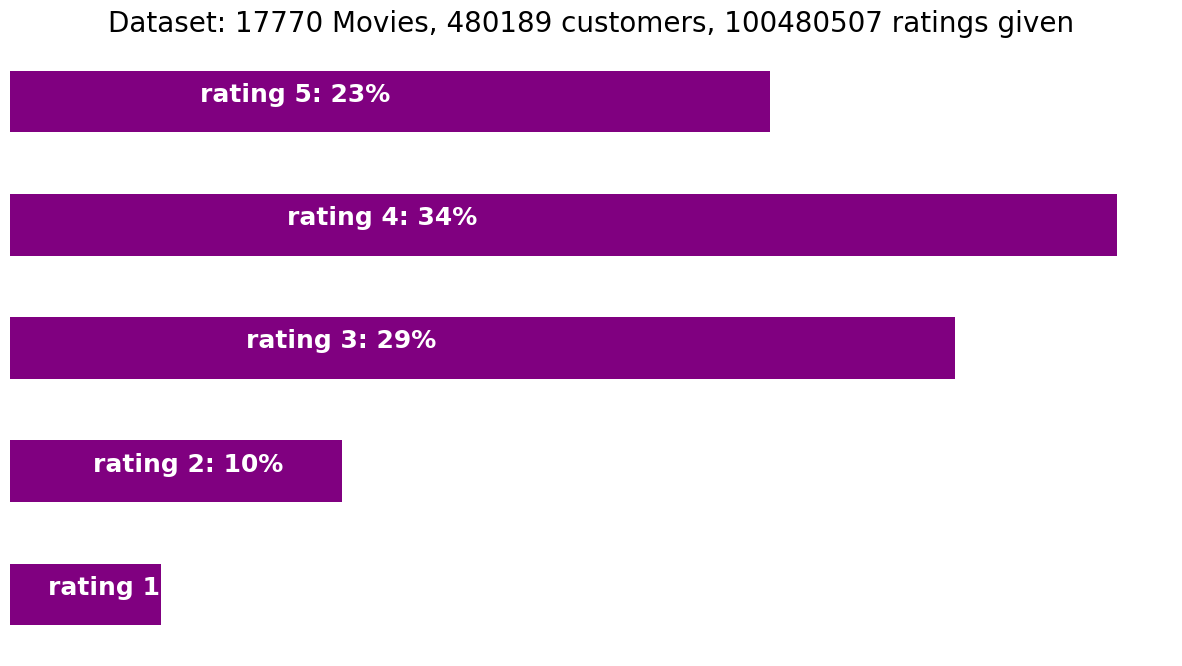

In [586]:
import matplotlib.pyplot as plt

p = df.groupby('rating')['rating'].agg(['count'])

movie_count = df['movie_id'].nunique()

cust_count = df['customer_id'].nunique()

rating_count = df['rating'].count()

ax = p.plot(kind = 'barh', legend = False, figsize = (15,8), color='purple')
plt.title(f'Dataset: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold', fontsize=18 )

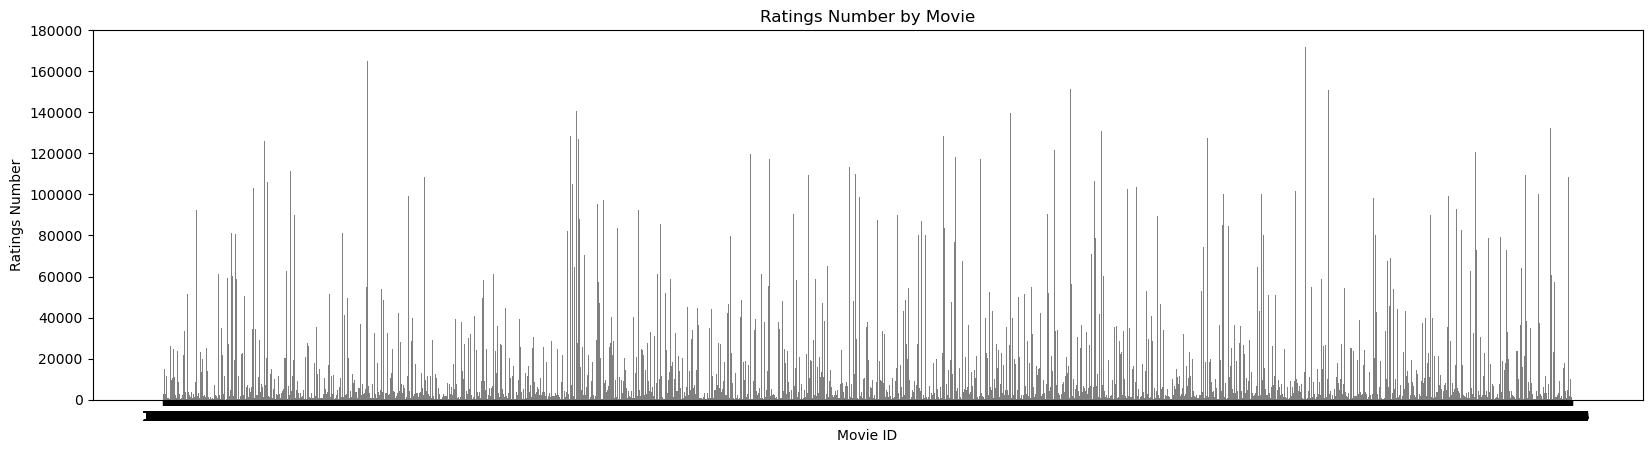

In [539]:
ratings_per_movie = df.groupby('movie_id', as_index=False)['rating'].count() 

ratings_per_movie.sort_values(by='movie_id', inplace=True) 

plt.figure().set_figwidth(20)
plt.bar(ratings_per_movie['movie_id'], ratings_per_movie['rating'], width=3.5, color = 'grey') 
plt.xlabel('Movie ID') 
plt.ylabel('Ratings Number') 
plt.title('Ratings Number by Movie') 
plt.ylim(top=180000)
plt.show()

In [581]:
df['customer_id'] = df['customer_id'].astype(int)
df['movie_id'] = df['movie_id'].astype(int)
df['rating'] = df['rating'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   customer_id  int64 
 1   rating       int64 
 2   review_date  object
 3   movie_id     int64 
dtypes: int64(3), object(1)
memory usage: 3.0+ GB


In [593]:
min_movie_ratings = 1000
max_movie_ratings = 5000
filter_movies = (df['movie_id'].value_counts()>min_movie_ratings)
filter_movies = (df['movie_id'].value_counts()<=max_movie_ratings)
filter_movies = filter_movies[filter_movies].index.tolist()

min_user_ratings = 200
max_user_ratings = 1000
filter_users = (df['customer_id'].value_counts()> min_user_ratings)
filter_users = (df['customer_id'].value_counts()<= max_user_ratings)
filter_users = filter_users[filter_users].index.tolist()

df_filtered_v1 = df[(df['movie_id'].isin(filter_movies)) & (df['customer_id'].isin(filter_users))]

df_filtered = df_filtered_v1[df_filtered_v1['movie_id'] <= 5000]


print(f'Shape unfiltered: {df.shape}')
print(f'Shape filtered: {df_filtered.shape}')
#df_filtered.to_csv('/Users/gorevaalina/Downloads/archive/cooked_data_filtered2.csv')

Shape unfiltered: (100480507, 4)
Shape filtered: (2343879, 4)


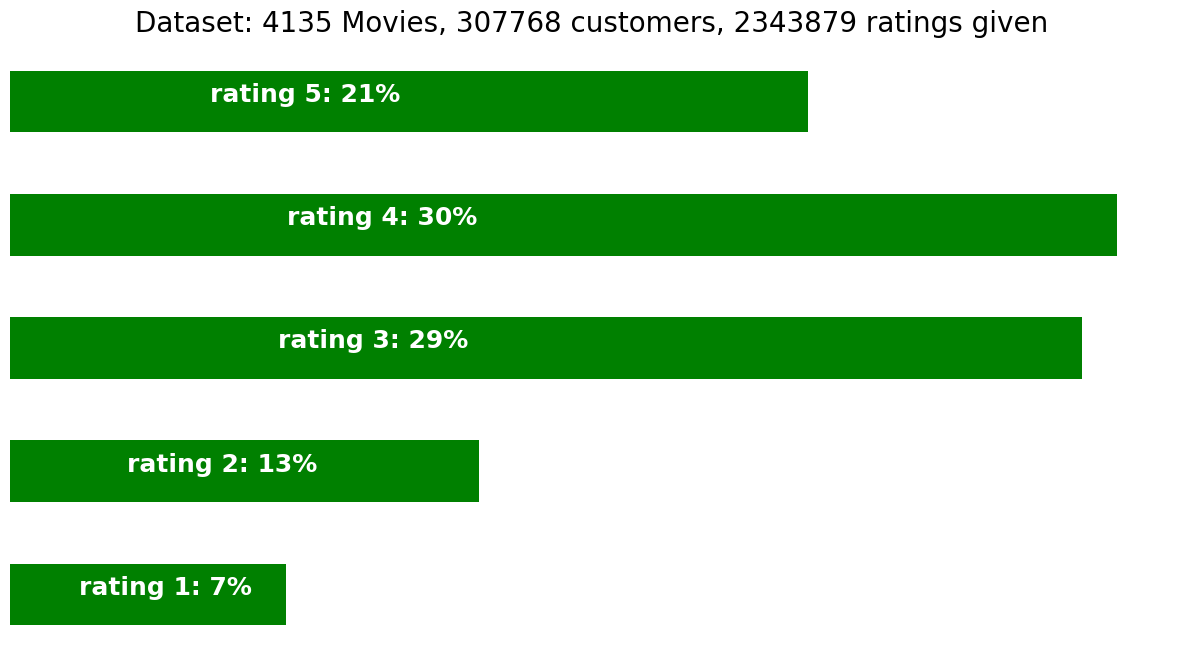

In [591]:
p2 = df_filtered.groupby('rating')['rating'].agg(['count'])

movie_count = df_filtered['movie_id'].nunique()

cust_count = df_filtered['customer_id'].nunique()

rating_count = df_filtered['rating'].count()

ax = p2.plot(kind = 'barh', legend = False, figsize = (15,8), color='green')
plt.title(f'Dataset: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p2.iloc[i-1][0]/4, i-1, 'rating {}: {:.0f}%'.format(i, p2.iloc[i-1][0]*100 / p2.sum()[0]), color = 'white', weight = 'bold', fontsize=18 )

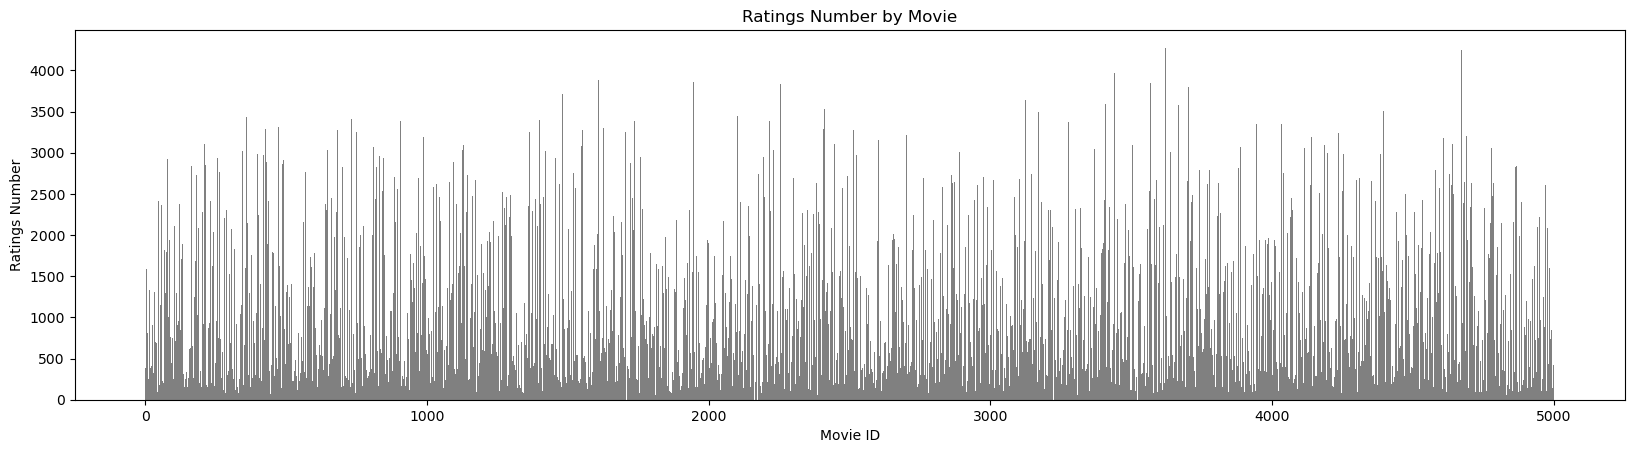

In [542]:
ratings_per_movie = df_filtered.groupby('movie_id', as_index=False)['rating'].count() 

ratings_per_movie.sort_values(by='movie_id', inplace=True) 

plt.figure().set_figwidth(20)
plt.bar(ratings_per_movie['movie_id'], ratings_per_movie['rating'], width=3.5, color = 'grey') 
plt.xlabel('Movie ID') 
plt.ylabel('Ratings Number') 
plt.title('Ratings Number by Movie') 
#plt.ylim(top=180000)
plt.show()

In [ ]:
df_filtered.to_csv('/Users/gorevaalina/Downloads/archive/cooked_data_filtered_1.csv')

In [543]:
df_filtered.sample(3)

,customer_id,rating,review_date,movie_id
21437119,1871073,4,2005-09-05,4027
6440839,304785,3,2004-10-18,1259
12128571,2031545,3,2005-06-14,2353


In [544]:
df_filtered[df_filtered['movie_id'] == 2363].sample(10)

,customer_id,rating,review_date,movie_id
12171531,62449,2,2004-06-29,2363
12171475,1034652,5,2003-12-02,2363
12171600,317069,5,2004-05-11,2363
12171410,1702824,5,2004-12-10,2363
12171588,2186836,5,2005-05-04,2363
12171512,1255867,3,2004-01-12,2363
12171494,2286468,5,2004-05-01,2363
12171539,2408066,5,2005-03-12,2363
12171597,596041,5,2005-03-09,2363
12171420,904421,3,2004-01-28,2363


In [545]:
df_filtered[df_filtered['customer_id'] == 920852].sample(5)

,customer_id,rating,review_date,movie_id
2749259,920852,3,2005-10-24,486
25414180,920852,5,2005-02-22,4725
530416,920852,4,2004-08-26,155
8913133,920852,4,2004-09-05,1776
951508,920852,3,2005-01-19,214


In [546]:
df_filtered[df_filtered['movie_id'] == 2363].sample(5)
#df_filtered.shape

,customer_id,rating,review_date,movie_id
12171480,611828,5,2003-01-22,2363
12171471,1863378,5,2004-08-24,2363
12171407,1338660,2,2004-05-01,2363
12171504,1729294,5,2005-01-12,2363
12171528,1139886,5,2005-08-09,2363


Average degree centrality : 0.31
Average betweenness centrality : 0.11
Diameter : 3
Density : 0.31


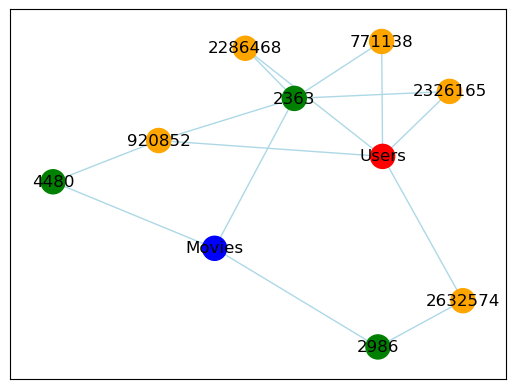

In [570]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

m_ids = [2363, 2986, 4480]
c_ids = [771138, 2326165,920852,2286468, 2632574]

df = df_filtered[(df_filtered['movie_id'].isin(m_ids)) & (df_filtered['customer_id'].isin(c_ids))]


users = set(df.customer_id)
movies = set(df.movie_id)

G = nx.Graph()


G.add_node('Users')
for m in movies:
    G.add_node(m)
    
G.add_node('Movies')
for u in users:
    G.add_node(u)
        
for _, row in df.iterrows():
    G.add_edge(row['customer_id'], row['movie_id'], weight=row['rating'])
    
for u in users:
    G.add_edge('Users', u)
        
for m in movies:
    G.add_edge('Movies', m)
    

pos = nx.spring_layout(G, seed=1)

node_color = []
for node in G.nodes:
    if node == 'Users':
        node_color.append('red')
    elif node == 'Movies':
        node_color.append('blue')
    elif node in users:
        node_color.append('purple')
    else:
        node_color.append('green')

#colors = nx.get_edge_attributes(G,'color').values()
#weights = nx.get_edge_attributes(G,'weight').values()

pos = nx.spring_layout(G, seed=1)

nx.draw_networkx(G, pos, 
        node_color=node_color, 
        width=1,
        with_labels=True,
        edge_color='lightblue')

degree_centrality = nx.degree_centrality(G)
avg_degree_centrality = round(sum(list(degree_centrality.values()))/len(list(degree_centrality.values())),2)
print(f'Average degree centrality : {avg_degree_centrality}')

betweenness_centrality = nx.betweenness_centrality(G)
avg_betweenness_centrality = round(sum(list(betweenness_centrality.values()))/len(list(betweenness_centrality.values())),2)
print(f'Average betweenness centrality : {avg_betweenness_centrality}')

diameter = nx.diameter(G)
print(f'Diameter : {diameter}')

density = nx.density(G)
print(f'Density : {round(density,2)}')



[ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 19 20 21 22 23]
Average degree centrality : 0.0005475996746808504
Average betweenness centrality : 0.00013588109716537142
Diameter : 3
Density : 0.0005475996746809494


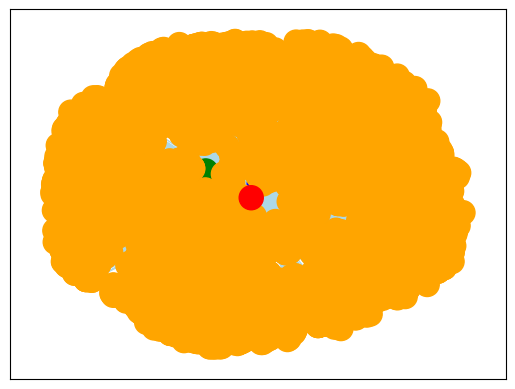

In [611]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

m = df_filtered['movie_id'].unique()[:20]

df2 = df_filtered[df_filtered['movie_id'].isin(m)]
#print(df2['movie_id'].value_counts())
print(df2['movie_id'].unique())

#df2 = df_filtered_v1[df_filtered_v1['movie_id'] <= 10]

users = set(df2.customer_id)
movies = set(df2.movie_id)

G2 = nx.Graph()


G.add_node('Users')
for m in movies:
    G2.add_node(m)
    
G2.add_node('Movies')
for u in users:
    G2.add_node(u)
        
for _, row in df2.iterrows():
    G2.add_edge(row['customer_id'], row['movie_id'], weight=row['rating'])
    
for u in users:
    G2.add_edge('Users', u)
        
for m in movies:
    G2.add_edge('Movies', m)
    

node_color = []
for node in G2.nodes:
    if node == 'Users':
        node_color.append('red')
    elif node == 'Movies':
        node_color.append('blue')
    elif node in users:
        node_color.append('orange')
    else:
        node_color.append('green')

pos = nx.spring_layout(G2, seed=1)

nx.draw_networkx(G2, pos, 
        node_color=node_color, 
        width=1,
        with_labels=False,
        edge_color='lightblue')

degree_centrality = nx.degree_centrality(G2)
avg_degree_centrality = sum(list(degree_centrality.values()))/len(list(degree_centrality.values()))
print(f'Average degree centrality : {avg_degree_centrality}')

betweenness_centrality = nx.betweenness_centrality(G2)
avg_betweenness_centrality = sum(list(betweenness_centrality.values()))/len(list(betweenness_centrality.values()))
print(f'Average betweenness centrality : {avg_betweenness_centrality}')

diameter = nx.diameter(G2)
print(f'Diameter : {diameter}')

density = nx.density(G2)
print(f'Density : {density}')

In [548]:
df_title = pd.read_csv('/Users/gorevaalina/Downloads/movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['movie_id', 'year', 'name'])

df_title['name'] = df_title['name'].astype(str)

col = "name"
df_title[col] = df_title[col].str.strip(';')

df_title.head(10)

,movie_id,year,name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
5,6,1997,Sick
6,7,1992,8 Man
7,8,2004,What the #$*! Do We Know!?
8,9,1991,Class of Nuke 'Em High 2
9,10,2001,Fighter


In [455]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [612]:
import numpy as np
import math
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()
data = Dataset.load_from_df(df_filtered[['customer_id', 'movie_id', 'rating']][:], reader)

svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])

{'test_rmse': array([1.0116773 , 1.01200926, 1.01307708, 1.01197559, 1.00952215]),
 'test_mae': array([0.79722085, 0.79820577, 0.7981748 , 0.79820789, 0.79589913]),
 'fit_time': (17.50406503677368,
  17.41688108444214,
  18.687373876571655,
  18.22533392906189,
  18.421394109725952),
 'test_time': (2.1945290565490723,
  2.1063990592956543,
  1.3900861740112305,
  2.1463277339935303,
  2.3499557971954346)}

In [550]:
df_785314 = df_filtered[(df_filtered['customer_id'] == 785314) & (df_filtered['rating'] == 5)]
df_title.reset_index()
df_title['movie_id']= pd.to_numeric(df_title['movie_id'], errors="coerce")
df_785314 = df_785314.merge(df_title,on='movie_id',how='left')
df_785314

,customer_id,rating,review_date,movie_id,year,name
0,785314,5,2002-03-18,57,1995,Richard III
1,785314,5,2005-08-09,395,1935,Captain Blood
2,785314,5,2004-11-09,907,1930,Animal Crackers
3,785314,5,2003-06-22,1552,1983,Black Adder
4,785314,5,2003-09-08,2713,1953,Glen or Glenda
5,785314,5,2002-02-03,2847,1920,The Mark of Zorro
6,785314,5,2003-09-08,3590,1963,Jason and the Argonauts
7,785314,5,2004-09-04,3949,1991,Terminator 2: Extreme Edition: Bonus Material
8,785314,5,2002-05-10,3984,1959,On the Beach
9,785314,5,2004-10-14,4253,1949,Kind Hearts and Coronets


In [551]:
recom_785314 = df_title.copy()
recom_785314 = recom_785314.reset_index()

data = Dataset.load_from_df(df_filtered[['customer_id', 'movie_id', 'rating']], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)

recom_785314['Estimate_Score'] = recom_785314['movie_id'].apply(lambda x: svd.predict(785314, x).est)

recom_785314 = recom_785314.drop('movie_id', axis = 1)

recom_785314 = recom_785314.sort_values('Estimate_Score', ascending=False)
recom_785314.head(10)

,index,year,name,Estimate_Score
559,559,2003,Star Trek: Enterprise: Season 3,5.000000
3887,3887,1994,NYPD Blue: Season 2,4.970367
31,31,2004,ABC Primetime: Mel Gibson's The Passion of th...,4.963453
3004,3004,1992,As Time Goes By: Series 1 and 2,4.892540
1914,1914,2000,Law & Order: Special Victims Unit: The Second...,4.813029
3072,3072,1997,Ballykissangel: Series 2,4.793232
662,662,1999,La Femme Nikita: Season 3,4.770331
777,777,2003,A Touch of Frost: Seasons 7 & 8,4.748415
4237,4237,2000,Inu-Yasha,4.739102
1688,1688,2003,Concert for George,4.708004


In [ ]:
frames = [df_filtered, df_title]
df_w_names = pd.concat(
    frames,
    join="outer", axis = 1)
df_w_names.head

In [ ]:
#df_filtered_name = df_filtered.join(df_title)['name']
frames = [df_filtered, df_title]
df_filtered_name = pd.concat(
    frames,  axis=1,
    join = 'outer',
    keys='movie_id').reindex(df_filtered.index)
#df_filtered_name = df_filtered_name[df_filtered_name[movie_id]<2]
#df_filtered_name = df_filtered_name.dropna(axis='rows')
print(df_filtered_name)